In [5]:
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [6]:
base_dir = './data/cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [16]:
### Importing models
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.inception_v3 import InceptionV3

In [17]:
pre_trained_model = ResNet101(input_shape = (75, 75, 3), # Input size
                                include_top = False, # No final fully connected layer
                                weights = 'imagenet')

In [18]:
for layer in pre_trained_model.layers:
    layer.trainable = False #Freeze convolution layers

### Role of callback

- Monitor. During the training process you can set some custom items such as stopping early, changing the learning rate, etc.

callbacks = [

  Stop if two epochs in a row have not been reduced：
  
      tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
  
  Learning rates can be changed dynamically：
  
      tf.keras.callbacks.LearningRateScheduler
      
  Save the model：
  
      tf.keras.callbacks.ModelCheckpoint
      
  Customised method：
  
      tf.keras.callbacks.Callback
]

In [19]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [20]:
from tensorflow.keras.optimizers import Adam

#Define the fully connected layer
x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
# Output layer
x = layers.Dense(1, activation='sigmoid')(x)           
# Constructe model sequences
model = Model(pre_trained_model.input, x) 

model.compile(optimizer = Adam(lr=0.001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (75, 75))     

validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (75, 75))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/100
100/100 - 13s - loss: 1.1292 - acc: 0.5205 - val_loss: 0.7094 - val_acc: 0.5170 - 13s/epoch - 130ms/step
Epoch 2/100
100/100 - 7s - loss: 0.7214 - acc: 0.5345 - val_loss: 0.6862 - val_acc: 0.5100 - 7s/epoch - 69ms/step
Epoch 3/100
100/100 - 7s - loss: 0.6878 - acc: 0.5445 - val_loss: 0.6861 - val_acc: 0.5350 - 7s/epoch - 69ms/step
Epoch 4/100
100/100 - 7s - loss: 0.6889 - acc: 0.5300 - val_loss: 0.6765 - val_acc: 0.5730 - 7s/epoch - 68ms/step
Epoch 5/100
100/100 - 7s - loss: 0.6869 - acc: 0.5470 - val_loss: 0.6751 - val_acc: 0.5900 - 7s/epoch - 68ms/step
Epoch 6/100
100/100 - 7s - loss: 0.6868 - acc: 0.5550 - val_loss: 0.6738 - val_acc: 0.5940 - 7s/epoch - 69ms/step
Epoch 7/100
100/100 - 7s - loss: 0.6883 - acc: 0.5415 - val_loss: 0.6719 - val_acc: 0.5940 - 7s/epoch - 68ms/step
Epoch 8/100
100/100 - 7s - loss: 0.6817 - acc: 0.5680 - val_loss: 0.6647 - val_acc: 0.6120 - 7s/epoch - 68ms/step
Epoch 9/100


KeyboardInterrupt: 

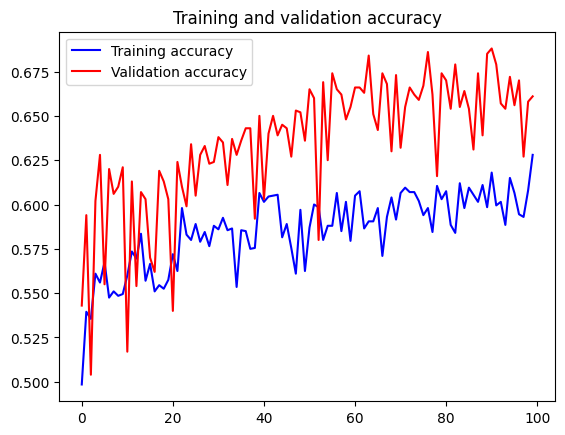

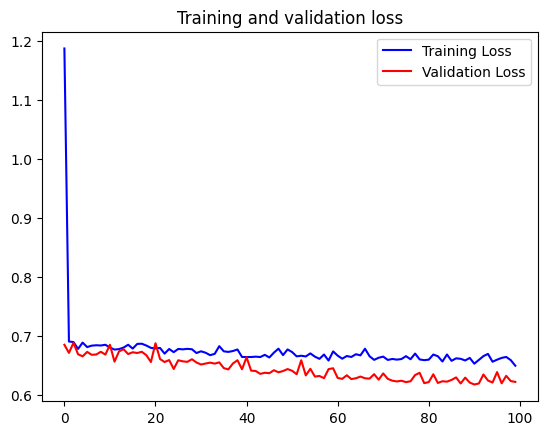

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### layer to take to

- last_layer = pre_trained_model.get_layer('layer name') 